# Machine Learning Project - Health Insurance Prediction :
---
- ### Write a program that takes in health data as input and uses machine learning algorithms to predict the expense of health insurance for an individual. The program should be able to handle various factors such as age, gender, medical history, lifestyle, etc.

- ### Your task is to choose multiple machine learning algorithms and compare their accuracy in predicting the cost of health insurance.

- ### Once you have chosen an algorithm with good performance, your next step will be training the model using available data. You may also need to preprocess the data by cleaning up missing values or removing outliers.
---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing necessary modules :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset into a pandas dataframe :

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Projects/ML Projects/Datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Checking the details of our dataframe :

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Checking missing/null values :

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


# Checking the unique regions :

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Plotting the correlation matrix :

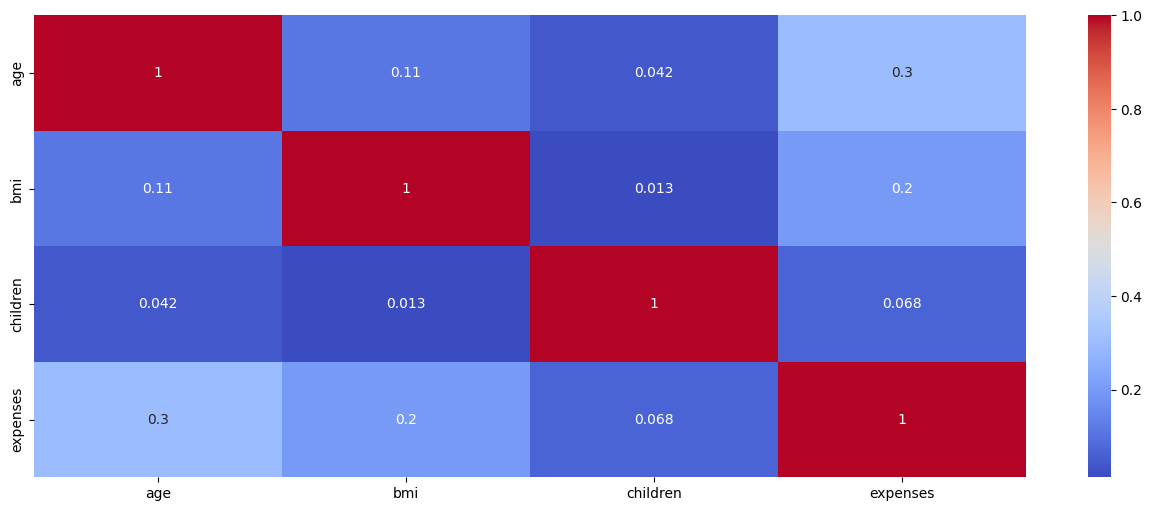

In [ ]:
plt.figure(figsize = (16,6))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

## So we can not plot the object type columns, like - **'sex','smoker','region'** in the correlation matrix.
---
# Using LabelEncoder from scikit-learn to convert the categorical columns **'sex'**, **'smoker'**, and **'region'** into numerical representations :

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


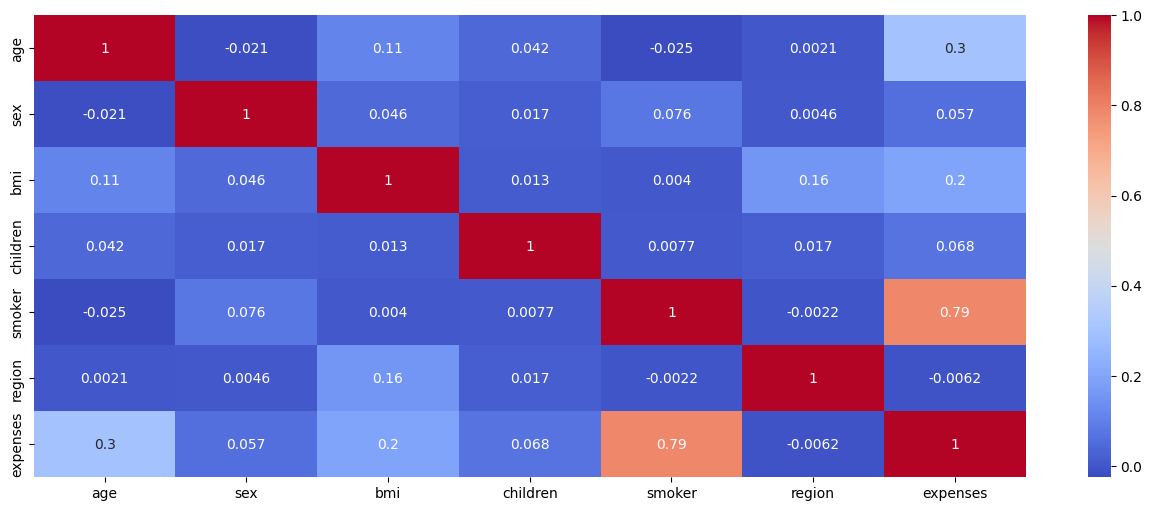

In [ ]:
plt.figure(figsize = (16,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

## As we can see : The **'expenses**' column has a high positive correlation with the **'smoker'** column.
---
# Separating features and target variable :

In [ ]:
x = df.drop(['expenses'], axis = 1)
y = df['expenses']
print(x)

      age  sex   bmi  children  smoker  region
0      19    0  27.9         0       1       3
1      18    1  33.8         1       0       2
2      28    1  33.0         3       0       2
3      33    1  22.7         0       0       1
4      32    1  28.9         0       0       1
...   ...  ...   ...       ...     ...     ...
1333   50    1  31.0         3       0       1
1334   18    0  31.9         0       0       0
1335   18    0  36.9         0       0       2
1336   21    0  25.8         0       0       3
1337   61    0  29.1         0       1       1

[1338 rows x 6 columns]


# Splitting data into training and testing sets :

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Scaling the features :

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Decision Tree Regressor :

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)
print("Decision Tree Regressor Accuracy :", dtr.score(x_test, y_test))

Decision Tree Regressor Accuracy : 0.7824014411936018


# Random Forest Regressor :

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)
print("Random Forest Regressor Accuracy :", rfr.score(x_test, y_test))

Random Forest Regressor Accuracy : 0.861277644076842


# Linear Regression :

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Linear Regression Accuracy :", lr.score(x_test, y_test))

Linear Regression Accuracy : 0.7394878130346696


## So far we have seen Random Forest Regressor is the best regressor for our data.
---
### ExtraTreesRegressor and GradientBoostingRegressor are ensemble learning methods used for regression tasks. They combine multiple decision trees to improve prediction accuracy.

- ### **ExtraTreesRegressor** builds multiple decision trees with random splits and averages their predictions. This randomness helps reduce overfitting and improve generalization.

- ### **GradientBoostingRegressor** builds trees sequentially, where each tree corrects the errors of the previous one. It focuses on difficult samples, leading to high accuracy.
---

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()

# Extra Trees Regressor :

In [ ]:
etr.fit(x_train, y_train)
y_pred_etr = etr.predict(x_test)
print("Linear Regression Accuracy :", etr.score(x_test, y_test))

Linear Regression Accuracy : 0.8582127919924307


# Gradient Boosting Regressor :

In [ ]:
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
print("Linear Regression Accuracy :", gbr.score(x_test, y_test))

Linear Regression Accuracy : 0.884582540123893


### So **GradientBoostingRegressor** is the best model in this case, as it has the highest accuracy score and a low Mean Squared Error.
---
## Calculating the **mean squared error** and **R-squared** to evaluate the Gradient Boosting Regressor model's performance :
- ### **Mean Squared Error (MSE) :** It is the average of the squared differences between the actual and predicted values. Lower MSE indicates better model accuracy.
- ### **R-squared :** It represents the proportion of variance in the dependent variable explained by the model. Higher R-squared indicates a better fit.

In [ ]:
mse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print("Mean Squared Error :", mse)
print("R-squared :", r2)

Mean Squared Error : 16778052.641012155
R-squared : 0.884582540123893
